Two initialization blocks.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pylab
import numpy as np

This file is interactive when loaded into an ipython/jupyter Notebook. Note to self: Don't forget to rewrite it as interactive web "Trinket," and as an Rmarkdown document.

### Here's code creating a function that flips a fair coin.

In [3]:
coin = ["H", "T"]

def coinflip():
    "flip a fair coin"
    return (random.choice(coin))

### Just execute the function to flip the coin.

In [4]:
coinflip()

'H'

### Here's code creating a function that flips a fair coin however many times you specify, and then reports the total number of heads followed by the total number of tails.

In [5]:
def multiflip(howmany):
    "flip a coin many times - [heads, tails]"
    totalheads = 0
    totaltails = 0
    for x in range(howmany):
        if coinflip() == "H":
            totalheads += 1
        else:
            totaltails += 1
    return([totalheads, totaltails])

### Just execute the function (specifying the number of flips) to see the result.

In [7]:
multiflip(1000)

[520, 480]

### Here's code creating a function that flips a fair coin however many times you specify, and then reports the total number of time heads was "winning" followed by the total number of tails was "winning" followed by the total number of times they were tied.

In [8]:
def multifliptallywinners(howmany):
    "flip a coin many times & track who is winning - [headwins, tailwins, ties]"
    totalheads = 0
    totaltails = 0
    headwins = 0
    tailwins = 0
    ties = 0
    for x in range(howmany):
        if coinflip() == "H":
            totalheads += 1
        else:
            totaltails += 1
        if totalheads > totaltails:
            headwins += 1
        elif totalheads < totaltails:
            tailwins += 1
        else:
            ties += 1
    return([totalheads, totaltails, headwins, tailwins, ties])

### Just execute the function (specifying the number of flips) to see the result.

In [10]:
multifliptallywinners(1000)

[499, 501, 739, 228, 33]

More interesting (to me) than the result from any individual run of coin flipping, would be to find some way to compare this "winners & ties" result to what might be a typical result. Unfortunately, I have neither instinct nor intuition as to what typical might be in this case.

So...it might be worthwhile to repeat the flipping & tallying and create distributions for winners and ties.

### Here's code creating a function that *repeats* flipping a fair coin however many times you specify, and then tallies the total number of time heads was "won" tallies the total number of times tails "won" and tallies the total number of times they were tied.

In [11]:
headwinsdistribution = []
tailwinsdistribution = []
tiesdistribution = []

def create3distributions(repetitions, howmany):
    "build distributions for headwins, tailwins, ties"
    for x in range(repetitions):
        result = multifliptallywinners(howmany)
        headwinsdistribution.append(result[2])
        tailwinsdistribution.append(result[3])
        tiesdistribution.append(result[4])

###Just execute the function (specifying the number of repetitions followed by the number of flips in each run) to construct the three distributions.

In [12]:
create3distributions(1000, 1000)

###A histogram is probably the best way to look at these distributions. Here's the one for heads:

(array([ 103.,   36.,   27.,   24.,   23.,   13.,   25.,   21.,   12.,
          18.,   13.,   21.,   11.,   20.,   13.,   12.,   16.,   18.,
          10.,   11.,   17.,   17.,    9.,   15.,   11.,   18.,   17.,
          10.,   13.,   10.,    8.,   16.,   13.,   12.,   13.,   15.,
          12.,   10.,   22.,   17.,   13.,   19.,   21.,   25.,   23.,
          21.,   26.,   28.,   31.,   71.]),
 array([    0.,    20.,    40.,    60.,    80.,   100.,   120.,   140.,
          160.,   180.,   200.,   220.,   240.,   260.,   280.,   300.,
          320.,   340.,   360.,   380.,   400.,   420.,   440.,   460.,
          480.,   500.,   520.,   540.,   560.,   580.,   600.,   620.,
          640.,   660.,   680.,   700.,   720.,   740.,   760.,   780.,
          800.,   820.,   840.,   860.,   880.,   900.,   920.,   940.,
          960.,   980.,  1000.]),
 <a list of 50 Patch objects>)

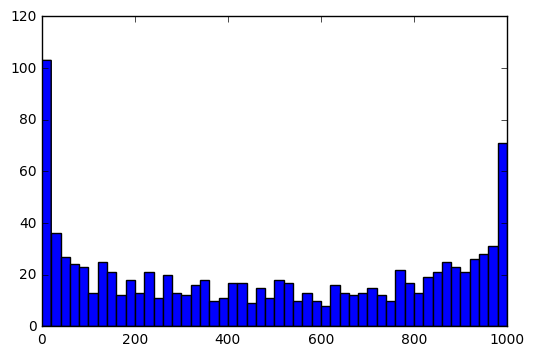

In [13]:
plt.hist(headwinsdistribution, bins = 50)

###Here's the distrbution for tails:

(array([ 108.,   47.,   36.,   24.,   21.,   19.,   19.,   16.,   20.,
         15.,    9.,   15.,   14.,    9.,   16.,   12.,   10.,    7.,
         15.,   13.,   14.,   13.,    9.,   10.,   16.,   12.,   15.,
         13.,   16.,   16.,   10.,   14.,    9.,   15.,   15.,   10.,
         15.,   21.,   18.,   16.,   17.,   11.,   13.,   27.,   22.,
         24.,   27.,   29.,   27.,   81.]),
 array([    0.,    20.,    40.,    60.,    80.,   100.,   120.,   140.,
         160.,   180.,   200.,   220.,   240.,   260.,   280.,   300.,
         320.,   340.,   360.,   380.,   400.,   420.,   440.,   460.,
         480.,   500.,   520.,   540.,   560.,   580.,   600.,   620.,
         640.,   660.,   680.,   700.,   720.,   740.,   760.,   780.,
         800.,   820.,   840.,   860.,   880.,   900.,   920.,   940.,
         960.,   980.,  1000.]),
 <a list of 50 Patch objects>)

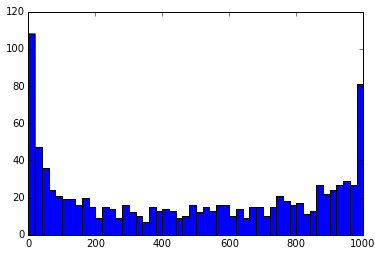

In [10]:
plt.hist(tailwinsdistribution, bins = 50)

###And here's the distrbution for ties:

(array([ 114.,  132.,  129.,  124.,  102.,   80.,   70.,   68.,   41.,
         40.,   34.,   22.,   16.,   11.,    3.,    7.,    2.,    1.,
          3.,    1.]),
 array([   0.,    5.,   10.,   15.,   20.,   25.,   30.,   35.,   40.,
         45.,   50.,   55.,   60.,   65.,   70.,   75.,   80.,   85.,
         90.,   95.,  100.]),
 <a list of 20 Patch objects>)

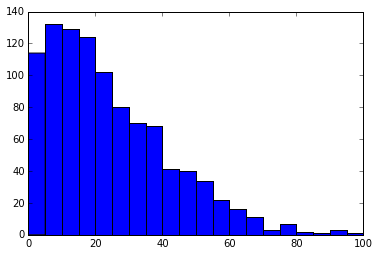

In [11]:
plt.hist(tiesdistribution, bins = 20)

###Maybe these distributions aren't the best perspective. Let's try looking at things from the perspective of the final winner. And for the moment restrict howmany to odd to force a final winner.

In [12]:
winnerwinsdistribution = []
winnerlossesdistribution = []
winnertiesdistribution = []
tiecount = 0

def create3moredistributions(repetitions, howmany):
    "build distributions for winnerwins, winnerlosses, winnerties"
    global tiecount
    for x in range(repetitions):
        result = multifliptallywinners(howmany)
        if result[0] > result[1]:
            winnerwinsdistribution.append(result[2])
            winnerlossesdistribution.append(result[3])
            winnertiesdistribution.append(result[4])
        elif result[0] < result[1]:
            winnerwinsdistribution.append(result[2])
            winnerlossesdistribution.append(result[3])
            winnertiesdistribution.append(result[4])
        else:
            tiecount += 1

In [13]:
create3moredistributions(1000, 1000)

(array([ 93.,  39.,  24.,  25.,  28.,  28.,   9.,  17.,  12.,  19.,  15.,
        18.,  13.,  10.,   7.,  13.,  14.,  13.,  15.,  15.,   7.,  17.,
        17.,  12.,  14.,  11.,  13.,   8.,  13.,  15.,   8.,  20.,  17.,
        12.,  20.,  16.,  13.,  15.,  14.,  11.,  14.,  16.,  15.,  15.,
        25.,  19.,  22.,  24.,  33.,  80.]),
 array([    0.,    20.,    40.,    60.,    80.,   100.,   120.,   140.,
         160.,   180.,   200.,   220.,   240.,   260.,   280.,   300.,
         320.,   340.,   360.,   380.,   400.,   420.,   440.,   460.,
         480.,   500.,   520.,   540.,   560.,   580.,   600.,   620.,
         640.,   660.,   680.,   700.,   720.,   740.,   760.,   780.,
         800.,   820.,   840.,   860.,   880.,   900.,   920.,   940.,
         960.,   980.,  1000.]),
 <a list of 50 Patch objects>)

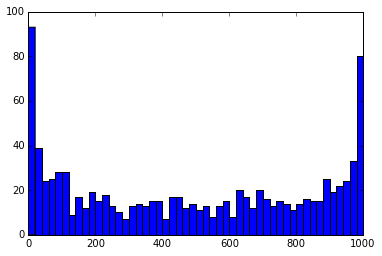

In [14]:
plt.hist(winnerwinsdistribution, bins = 50)

(array([ 98.,  34.,  23.,  26.,  23.,  16.,  22.,  13.,  10.,  14.,  15.,
        18.,  13.,  25.,  14.,   8.,  19.,  11.,  18.,  16.,  11.,  10.,
        10.,  13.,  14.,  15.,  14.,  16.,  11.,  15.,  14.,  11.,   9.,
        10.,   5.,  22.,  13.,  16.,  10.,  17.,  17.,  13.,  13.,  26.,
        19.,  21.,  25.,  25.,  39.,  73.]),
 array([    0.,    20.,    40.,    60.,    80.,   100.,   120.,   140.,
         160.,   180.,   200.,   220.,   240.,   260.,   280.,   300.,
         320.,   340.,   360.,   380.,   400.,   420.,   440.,   460.,
         480.,   500.,   520.,   540.,   560.,   580.,   600.,   620.,
         640.,   660.,   680.,   700.,   720.,   740.,   760.,   780.,
         800.,   820.,   840.,   860.,   880.,   900.,   920.,   940.,
         960.,   980.,  1000.]),
 <a list of 50 Patch objects>)

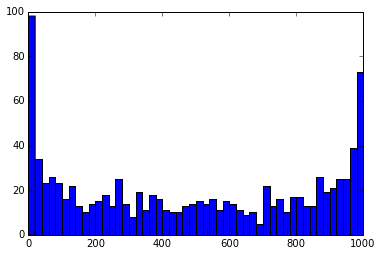

In [15]:
plt.hist(winnerlossesdistribution, bins = 50)

(array([ 69.,  45.,  43.,  49.,  46.,  48.,  46.,  45.,  43.,  39.,  34.,
        45.,  35.,  27.,  29.,  30.,  57.,  30.,  20.,  22.,  19.,  17.,
         9.,  13.,  14.,  10.,  11.,   8.,  10.,   7.,   4.,   4.,   6.,
        12.,   6.,   1.,   3.,   2.,   3.,   0.,   0.,   0.,   1.,   0.,
         0.,   0.,   0.,   0.,   0.,   1.]),
 array([   0.  ,    2.06,    4.12,    6.18,    8.24,   10.3 ,   12.36,
         14.42,   16.48,   18.54,   20.6 ,   22.66,   24.72,   26.78,
         28.84,   30.9 ,   32.96,   35.02,   37.08,   39.14,   41.2 ,
         43.26,   45.32,   47.38,   49.44,   51.5 ,   53.56,   55.62,
         57.68,   59.74,   61.8 ,   63.86,   65.92,   67.98,   70.04,
         72.1 ,   74.16,   76.22,   78.28,   80.34,   82.4 ,   84.46,
         86.52,   88.58,   90.64,   92.7 ,   94.76,   96.82,   98.88,
        100.94,  103.  ]),
 <a list of 50 Patch objects>)

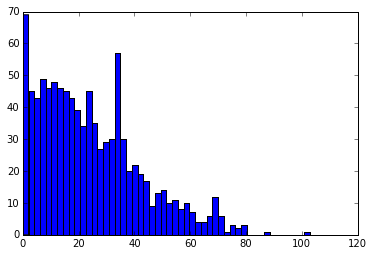

In [16]:
plt.hist(winnertiesdistribution, bins = 50)

##Please send any comments or corrections to: ppetto@ppetto.com

In [17]:
%whos

Variable                   Type        Data/Info
------------------------------------------------
coin                       list        n=2
coinflip                   function    <function coinflip at 0x10d8b8320>
create3distributions       function    <function create3distributions at 0x10d8b85f0>
create3moredistributions   function    <function create3moredist<...>ributions at 0x10da3e848>
headwinsdistribution       list        n=1000
multiflip                  function    <function multiflip at 0x10d8b86e0>
multifliptallywinners      function    <function multifliptallywinners at 0x10d8b8578>
tailwinsdistribution       list        n=1000
tiecount                   int         37
tiesdistribution           list        n=1000
winnerlossesdistribution   list        n=963
winnertiesdistribution     list        n=963
winnerwinsdistribution     list        n=963
